<a href="https://colab.research.google.com/github/firlisafitri/Machine_Learning/blob/main/Customer_Segmentation_Firli_Safitri_2019102010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**PRAKTIKUM MACHINE LEARNING**


* **Pada Praktikum kali ini akan dilakukan Segmentasi Customer**
* **Sumber Dataset dapat diperoleh di https://www.kaggle.com/shwetabh123/mall-customers**
* **Tujuan Segmentasi : Mendapatkan background dari Konsumen**
* **Segmentasi Konsumen adalah suatu proses membagi konsumen berdasarkan beberapa kelompok konsumen yang memiliki kesamaan dalam cara yang berbeda yang relevan dengan pemasaran seperti jenis kelamin, usia, minat, dan kebiasaan belanja lain-lain**
 
**Teknik segmentasi pelanggan bergantung pada beberapa pembeda utama yang membagi pelanggan ke dalam kelompok-kelompok yang akan dibidik. Data yang terkait dengan demografi, geografi, status ekonomi, serta pola perilaku memainkan peran penting dalam menentukan arah perusahaan untuk menangani berbagai segmen**

In [ ]:
#baca dataset
import pandas as pd
import numpy as np 
data_konsumen=pd.read_csv("/content/drive/MyDrive/Dataset/Mall_Customers.csv")
data_konsumen

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data_konsumen.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
data_konsumen.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data_konsumen.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data_konsumen['Age']

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [ ]:
data_konsumen['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [ ]:
data_konsumen['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [ ]:
data_konsumen['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [ ]:
#print(data_konsumen)
column_values = data_konsumen[["Genre"]].values.ravel()
unique_values = pd. unique(column_values)
print(unique_values)

['Male' 'Female']


In [ ]:
#Hitung data konsumen berdasarkan Gender
data_konsumen['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [ ]:
#simpan data Gender tsb dalam variabel baru
data_Genre=data_konsumen['Genre'].value_counts()
data_Genre

Female    112
Male       88
Name: Genre, dtype: int64

In [ ]:
gender_summary=data_konsumen.groupby('Genre').agg(tot_suicide=('Genre','sum')).sort_values(by='Genre',ascending=True)
gender_summary

,tot_suicide
Genre,
Female,FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...
Male,MaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMa...


**Customer Gender Visualization**

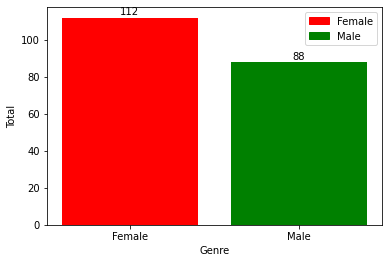

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data_Genre=data_konsumen['Genre'].value_counts()
unique_values=['Female','Male']

# Visualisasi data Gender dalam barplot
legenda={'Female':'red','Male':'green'}
warna =['red','green']
y_pos = np.arange(len(unique_values))
#format plt.bar(x,y)
plt.bar(unique_values,data_konsumen['Genre'].value_counts(),color=warna)
 
labels = list(legenda.keys())
handles = [plt.Rectangle((0,0),1,1, color=legenda[label]) for label in labels]
plt.legend(handles, labels)

# add the annotations
for y, x in zip(data_Genre, y_pos):
    plt.annotate(f'{y}\n', xy=(x, y), ha='center', va='center')

plt.xlabel('Genre')
plt.ylabel('Total')
plt.show()

**KESIMPULAN =**
* **Dari Barplot di atas, terlihat bahwa jumlah Wanita/Female(112) lebih banyak daripada Laki-Laki/Male(88)**


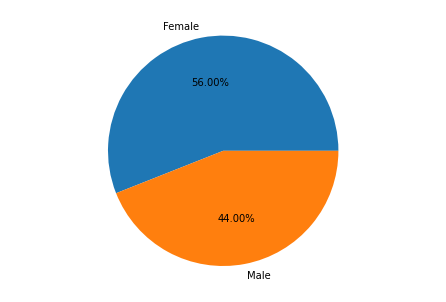

In [ ]:
## Visualisasi data Gender dalam PieChart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

unique_values=['Female','Male']
data_Genre=data_konsumen['Genre'].value_counts()

ax.pie(data_Genre,labels=unique_values,autopct='%1.2f%%')
plt.show()

**KESIMPULAN =**
* **Dari grafik di atas, terlihat bahwa persentase Female/wanita adalah 56%, sedangkan persentase Male/pria dalam dataset pelanggan adalah 44%.**


**Visualization of Age Distribution**

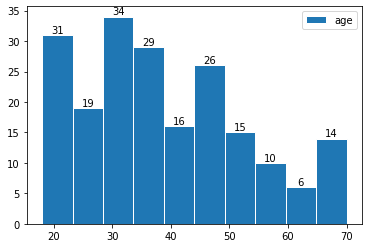

In [ ]:
#Visualisasi Distribusi Data Usia
x=data_konsumen['Age']
#plt.hist = histogram 
freq, bins, patches = plt.hist(x, edgecolor='white', label='age', bins=10)

# x coordinate for labels
bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
  height = int(freq[n])
  plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar -> untuk melihat sebaran data
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
  n = n+1

plt.legend()
plt.show()

**Visualisasi Data Dalam BoxPlot**

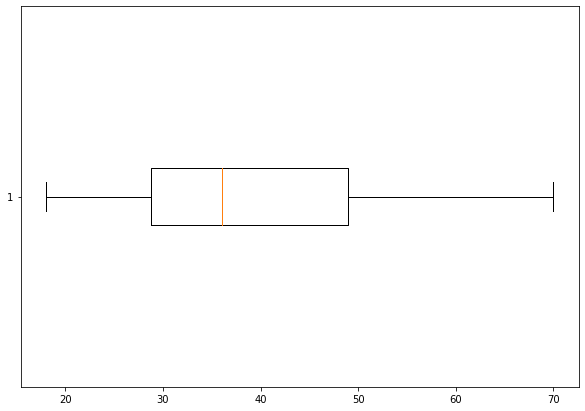

In [ ]:
data_usia=data_konsumen['Age']
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
#plt.boxplot(data_usia)
plt.boxplot(data_usia, vert=False)
plt.show()

**KESIMPULAN =**
* **Dari dua visualisasi di atas Histogram dan Boxplot, bahwa usia pelanggan terbanyak adalah antara 30 dan 35 tahun.**
* **Usia minimum pelanggan adalah 18 tahun, sedangkan usia maksimum adalah 70
tahun**


**TUGAS**
* **Lakukan analisis untuk 'Annual Income' dari konsumen**
* **Lakukan analisis untuk 'Spending Score' dari konsumen**


##Analisis untuk Spending Score dari konsumen

**Visualization of Spending Score Distribution**

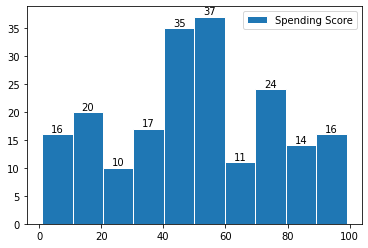

In [ ]:
#Visualisasi Distribusi Data Spending Score
x=data_konsumen['Spending Score (1-100)']
#plt.hist = histogram 
freq, bins, patches = plt.hist(x, edgecolor='white', label='Spending Score', bins=10)

# x coordinate for labels
bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
  height = int(freq[n])
  plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar -> untuk melihat sebaran data
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
  n = n+1

plt.legend()
plt.show()

**Visualisasi Spending Score Dalam BoxPlot**

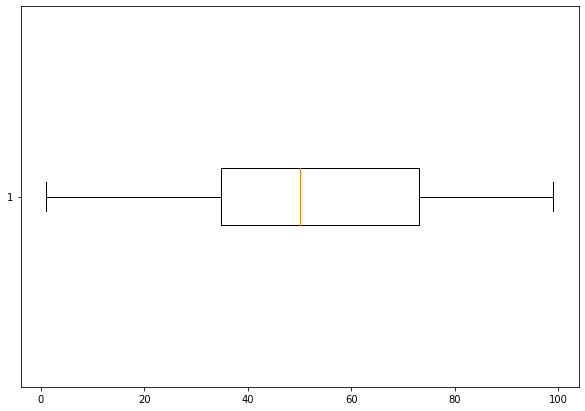

In [ ]:
data_spending_score=data_konsumen['Spending Score (1-100)']
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
#plt.boxplot(data_spending_score)
plt.boxplot(data_spending_score, vert=False)
plt.show()

**KESIMPULAN =**
* **Dari dua visualisasi di atas Histogram dan Boxplot, bahwa Spending Score terbanyak adalah antara 40 dan 55.**
* **Spending Score minimum adalah bernilai 1, sedangkan Spending Score maksimum adalah bernilai 100.**
